In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import squarify

In [2]:
wine_150k = pd.read_csv(r'../input/winemag-data_first150k.csv')
wine_130k = pd.read_csv(r'../input/winemag-data-130k.csv')

In [3]:
wine = pd.concat([ wine_150k, wine_130k], axis = 0,sort=False)

In [4]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


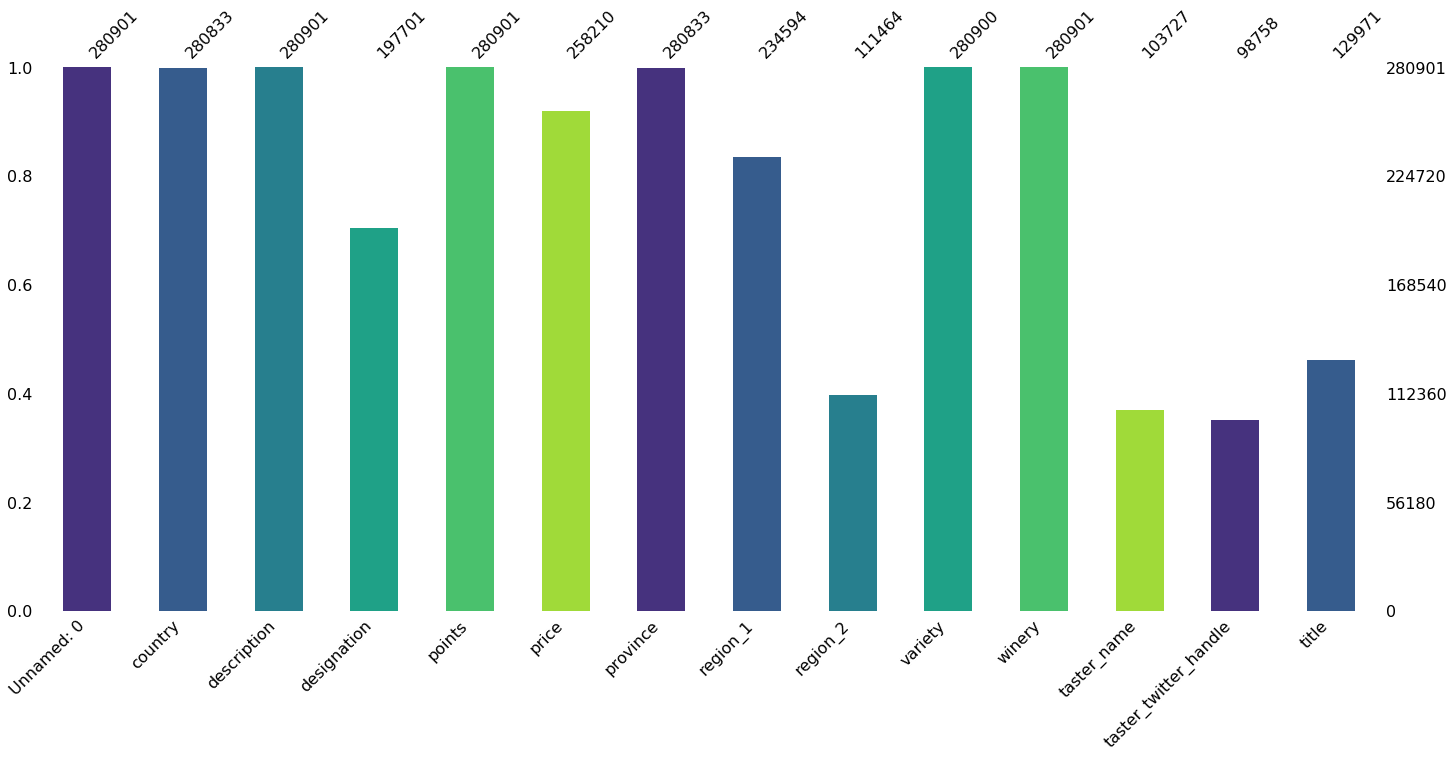

In [5]:
msno.bar(wine,color= sns.color_palette('viridis'))

In [8]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'taster_name', 'taster_twitter_handle', 'title'],
      dtype='object')

In [13]:
columns = ['Unnamed: 0','designation','winery','taster_name','taster_twitter_handle','title','region_1','region_2']
wine.drop(columns,axis = 1)


,country,description,points,price,province,variety
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Riesling
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Pinot Noir
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Gewürztraminer
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Pinot Gris


Number of country list in data: 50


Text(0.5, 1.0, 'Distribution of Wine Reviews by Top 20 Countries')

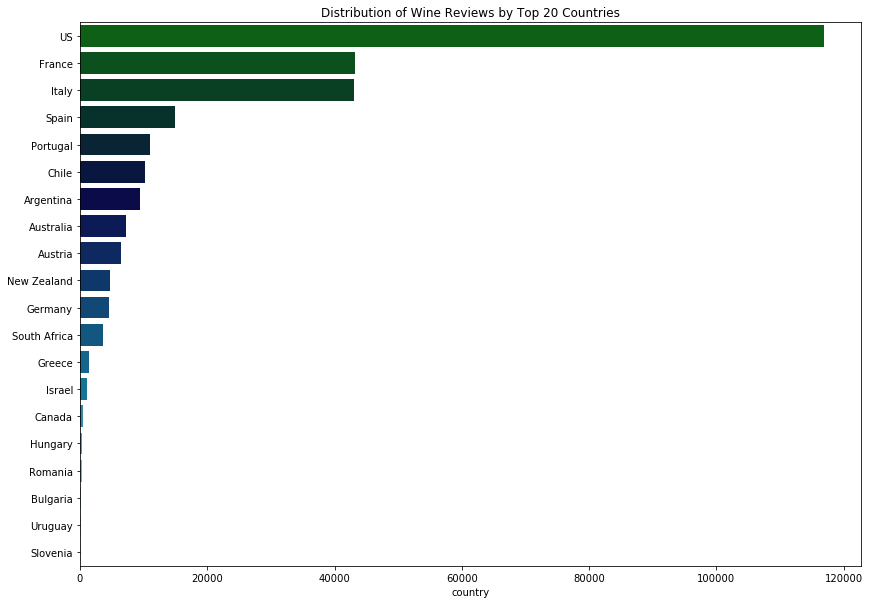

In [14]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize =(14,10))
cnt = wine['country'].value_counts().to_frame()[0:20]

#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries')

In [15]:
wine.describe()

,Unnamed: 0,points,price
count,280901.000000,280901.000000,258210.000000
mean,70615.705960,88.146934,34.177162
std,41214.379445,3.151528,38.611708
min,0.000000,80.000000,4.000000
25%,35112.000000,86.000000,16.000000
50%,70225.000000,88.000000,25.000000
75%,105337.000000,90.000000,40.000000
max,150929.000000,100.000000,3300.000000


In [ ]:
f , ax =  plt.subplots(1,2, figsize = (14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color ='r',ax = ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine['price'], ax = ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')


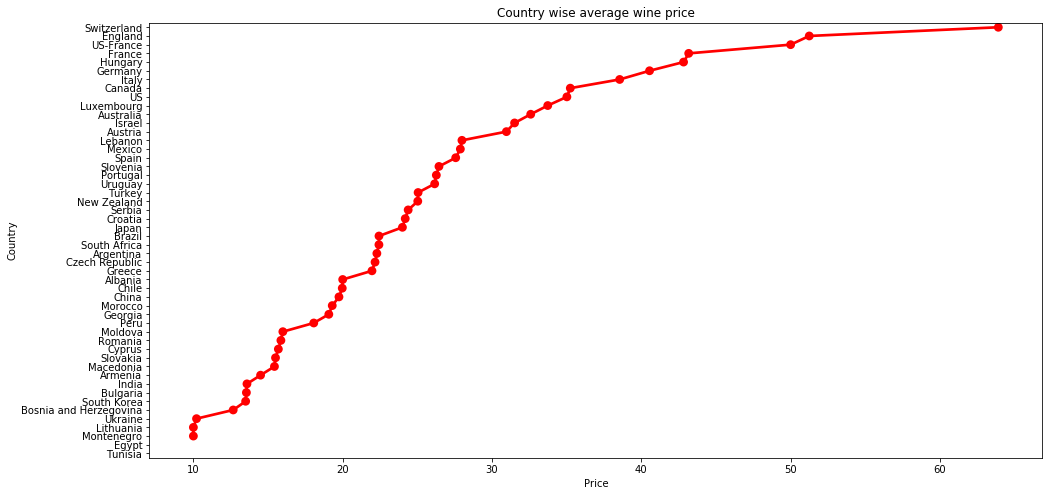

In [16]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

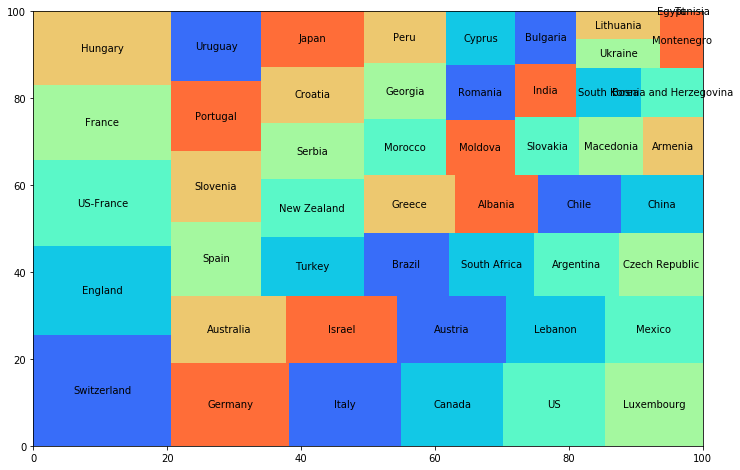

In [17]:
cnt = wine.groupby(by = 'country')['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)

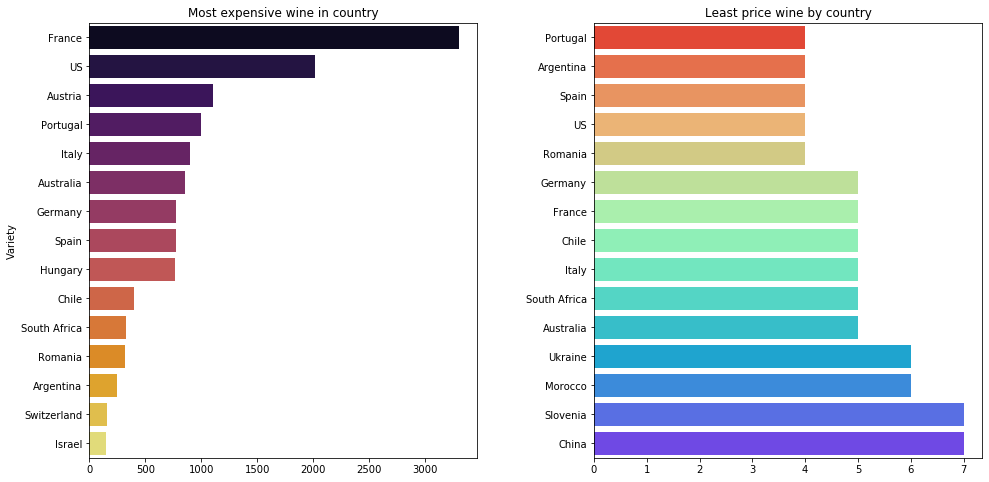

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

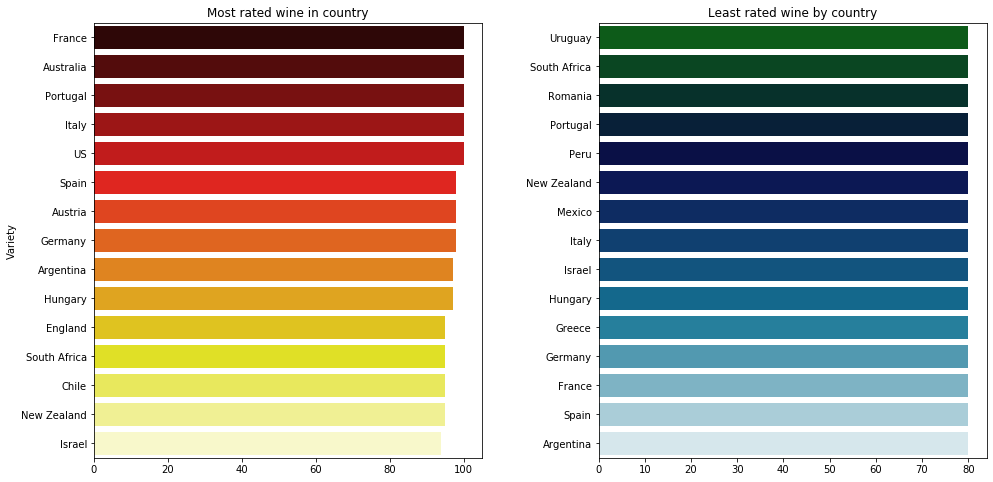

In [22]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [23]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [24]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [25]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [26]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    

Recmmendation for Tempranillo-Shiraz:

1: Verdil with distance: 0.0
2: Monastrell-Petit Verdot with distance: 0.0
3: Bobal with distance: 0.2928932188134524
4: Syrah-Tempranillo with distance: 0.31291280261140186
5: Chardonnay-Sauvignon Blanc with distance: 0.4270485104506998


In [39]:
query_index = np.random.choice(wine_pivot.shape[0])
distance , indices = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

for i in range(len(distance.flatten())):
    if i == 0:
        print('Recommendate for {0} :\n '.format(wine_pivot.index[query_index]))
    else:
        print ('{0}: {1} with {2}'.format(i,wine_pivot.index[indices.flatten()[i]], distance.flatten()[i]))
            


Recommendate for Verduzzo Friulano  :
 
1: Pignolo with 0.0
2: Groppello with 0.0
3: Verduzzo Friulano  with 0.0
4: Moscato Rosa with 0.0
5: Incrocio Manzoni with 0.0


'Aglianico'